# Machine Learning
### Textbook is available at: [https://www.github.com/a-mhamdi/isetbz](https://www.github.com/a-mhamdi/isetbz)

---

### Multiple Linear Regression

**Importing the libraries**

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
plt.style.use("ggplot")

**Importing the dataset**

In [54]:
df = pd.read_csv("Datasets/50_Startups.csv")

In [55]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [57]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Extract features $X$ and target $y$ from the dataset. **Profit** is the dependant variable.

In [58]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Check the first five observations within $X$

In [59]:
print(X[:5])

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]


Check the corresponding first five values from **Profit** column.

In [60]:
print(y[:5])

[192261.83 191792.06 191050.39 182901.99 166187.94]


**Encoding categorical data**

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [62]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [63]:
print(X[:5])

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


**Splitting the dataset into training set and test set**

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

**Training the multiple linear regression model on the training set**

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Making predictions using the $X$ test set**

In [68]:
y_pred = lr.predict(X_test)

**Comparison**

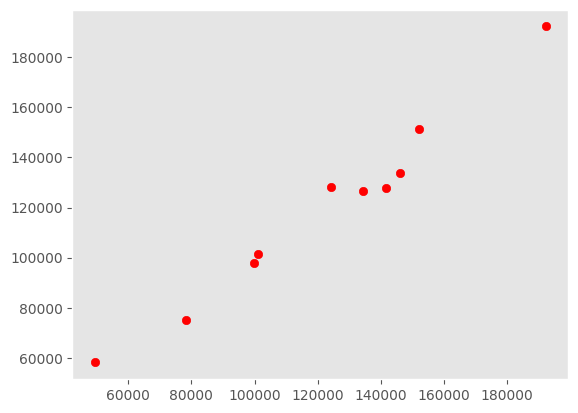

In [69]:
plt.scatter(y_test, y_pred, c="red") # GET AN INSIGHT ABOUT CORRELATION BETWEEN Y_TEST AND Y_PRED
plt.grid()